In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [ ]:
#create model class that inherits nn module
class Model (nn.Module):
  #input_layer: 5 features of drug --> output layer 5 types of drugs so 5 output neurons
  def __init__(self,input_features=5,h1=10,h2=10,h3=10,output_features=5):
    super().__init__()
    self.fc1 = nn.Linear(input_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.out = nn.Linear(h3,output_features)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = f.relu(self.fc3(x))
    x = f.relu(self.out(x))
    return x

In [ ]:
#pick random seed for randomisation
torch.manual_seed = 41

model = Model()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [ ]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df["Drug"] = df["Drug"].replace("drugA",0)
df["Drug"] = df["Drug"].replace("drugB",1)
df["Drug"] = df["Drug"].replace("drugC",2)
df["Drug"] = df["Drug"].replace("drugX",3)
df["Drug"] = df["Drug"].replace("DrugY",4)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,2
196,16,M,LOW,HIGH,12.006,2
197,52,M,NORMAL,HIGH,9.894,3
198,23,M,NORMAL,NORMAL,14.020,3


In [ ]:
# df["BP"].unique()
df["BP"] = df["BP"].replace("HIGH",1)
df["BP"] = df["BP"].replace("NORMAL",0)
df["BP"] = df["BP"].replace("LOW",-1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,1,HIGH,25.355,4
1,47,M,-1,HIGH,13.093,2
2,47,M,-1,HIGH,10.114,2
3,28,F,0,HIGH,7.798,3
4,61,F,-1,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,F,-1,HIGH,11.567,2
196,16,M,-1,HIGH,12.006,2
197,52,M,0,HIGH,9.894,3
198,23,M,0,NORMAL,14.020,3


In [ ]:
df["Cholesterol"] = df["Cholesterol"].replace("HIGH",1)
df["Cholesterol"] = df["Cholesterol"].replace("NORMAL",0)
df["Cholesterol"] = df["Cholesterol"].replace("LOW",-1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,1,1,25.355,4
1,47,M,-1,1,13.093,2
2,47,M,-1,1,10.114,2
3,28,F,0,1,7.798,3
4,61,F,-1,1,18.043,4
...,...,...,...,...,...,...
195,56,F,-1,1,11.567,2
196,16,M,-1,1,12.006,2
197,52,M,0,1,9.894,3
198,23,M,0,0,14.020,3


In [ ]:
df["Sex"] = df["Sex"].replace("F",0)
df["Sex"] = df["Sex"].replace("M",1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,1,25.355,4
1,47,1,-1,1,13.093,2
2,47,1,-1,1,10.114,2
3,28,0,0,1,7.798,3
4,61,0,-1,1,18.043,4
...,...,...,...,...,...,...
195,56,0,-1,1,11.567,2
196,16,1,-1,1,12.006,2
197,52,1,0,1,9.894,3
198,23,1,0,0,14.020,3


In [ ]:
#test train split
x = df.drop(["Drug"],axis=1)
y = df["Drug"]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,1,1,25.355
1,47,1,-1,1,13.093
2,47,1,-1,1,10.114
3,28,0,0,1,7.798
4,61,0,-1,1,18.043
...,...,...,...,...,...
195,56,0,-1,1,11.567
196,16,1,-1,1,12.006
197,52,1,0,1,9.894
198,23,1,0,0,14.020


In [ ]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [ ]:
#convert to numpy arrays
x = x.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =   train_test_split(x,y,test_size = 0.2,random_state = 41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)
Y_train.size()

torch.Size([160])

In [ ]:
#select criterion as model to measure error
criterion = nn.CrossEntropyLoss()
#choose optimiser,adam optimiser,learning_rate(lr) , if error doesnt go down after a couple of epochs then we need lower learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.00001)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=5, bias=True)
)>

In [ ]:
#train, determine how many epochs,
epochs = 500
losses = []
for i in range(epochs):
  Y_pred = model.forward(X_train)


  #measure loss, it is high at first
  loss = criterion(Y_pred,Y_train)
  #track losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10==0:
    print(f"EPOCH : {i}  ::  LOSS : {loss}")

  #do back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Streaming output truncated to the last 5000 lines.
EPOCH : 950000  ::  LOSS : 0.33205294609069824
EPOCH : 950010  ::  LOSS : 0.33205080032348633
EPOCH : 950020  ::  LOSS : 0.33205151557922363
EPOCH : 950030  ::  LOSS : 0.3320513367652893
EPOCH : 950040  ::  LOSS : 0.3320506513118744
EPOCH : 950050  ::  LOSS : 0.33205080032348633
EPOCH : 950060  ::  LOSS : 0.3320513665676117
EPOCH : 950070  ::  LOSS : 0.33205145597457886
EPOCH : 950080  ::  LOSS : 0.33205094933509827
EPOCH : 950090  ::  LOSS : 0.33205094933509827
EPOCH : 950100  ::  LOSS : 0.33205151557922363
EPOCH : 950110  ::  LOSS : 0.3320516049861908
EPOCH : 950120  ::  LOSS : 0.33205103874206543
EPOCH : 950130  ::  LOSS : 0.3320505619049072
EPOCH : 950140  ::  LOSS : 0.33205118775367737
EPOCH : 950150  ::  LOSS : 0.33205145597457886
EPOCH : 950160  ::  LOSS : 0.3320511281490326
EPOCH : 950170  ::  LOSS : 0.33205288648605347
EPOCH : 950180  ::  LOSS : 0.33205094933509827
EPOCH : 950190  ::  LOSS : 0.3320513665676117
EPOCH : 950200  

Text(0.5, 0, 'Epoch')

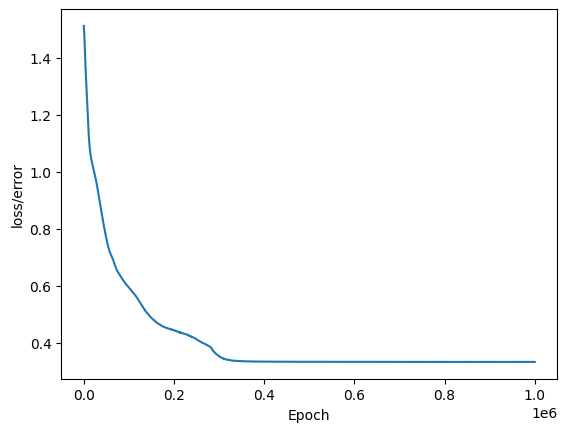

In [ ]:
#graph
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [ ]:
#evaluate model on test data set
with torch.no_grad():#turn of back-propagation
  Y_eval = model.forward(X_test)
  loss = criterion(Y_eval,Y_test)

In [ ]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    Y_val = model.forward(data)
    print(f"{i+1}.)\t{Y_test[i]}\t{Y_val.argmax().item()}")
    #correct or not
    if Y_val.argmax().item() == Y_test[i]:
      correct += 1

print(f"We have Correct:{correct}")

1.)	4	4
2.)	3	3
3.)	4	4
4.)	2	3
5.)	4	4
6.)	4	4
7.)	3	3
8.)	4	4
9.)	3	3
10.)	4	4
11.)	3	3
12.)	0	0
13.)	4	4
14.)	3	3
15.)	4	4
16.)	4	4
17.)	4	4
18.)	4	4
19.)	3	3
20.)	0	0
21.)	4	4
22.)	4	4
23.)	4	4
24.)	3	3
25.)	3	3
26.)	3	3
27.)	3	4
28.)	1	1
29.)	0	0
30.)	1	1
31.)	0	0
32.)	4	4
33.)	4	4
34.)	1	1
35.)	4	4
36.)	0	0
37.)	3	3
38.)	4	4
39.)	1	4
40.)	4	4
We have Correct:37
